In [1]:
import time
import pandas as pd

In [2]:
start = time.time()
df = pd.read_csv("s3://yelp-dataset-pt-9/data/csv/reviews.csv")
print(time.time() - start)

231.57853651046753


# Total Reviews

In [3]:
print(f'{len(df):,}')

8,021,124


# Missing Values 

In [4]:
df.isna().sum()

review_id      0
user_id        0
business_id    2
stars          2
useful         2
funny          2
cool           2
text           4
date           4
dtype: int64

In [5]:
original = df.copy()
df = df.dropna()
df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [6]:
print(f'{len(df):,}')

8,021,118


# Languages 

In [7]:
!pip install pycld2

You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import pycld2 as cld2
import numpy as np
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 72 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [9]:
def check_language(review):
    try:
        isReliable, textBytesFound, details, vectors = cld2.detect(review, returnVectors=True)
        return isReliable, textBytesFound, details, vectors, len(vectors)
    except:
        return np.NaN, np.NaN, np.NaN, np.NaN, np.NaN

In [10]:
start = time.time()
df['isReliable'], df['textBytesFound'], df['details'], df['vectors'], df['lenVectors'] = zip(*df['text'].parallel_apply(check_language, convert_dtype=False))
time.time() - start

66.57341432571411

In [11]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,isReliable,textBytesFound,details,vectors,lenVectors
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,1.0,1318.0,"((ENGLISH, en, 99, 1321.0), (Unknown, un, 0, 0...","((0, 1373, ENGLISH, en),)",1.0
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52,1.0,1358.0,"((ENGLISH, en, 99, 1397.0), (Unknown, un, 0, 0...","((0, 1407, ENGLISH, en),)",1.0
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,1.0,420.0,"((ENGLISH, en, 99, 1449.0), (Unknown, un, 0, 0...","((0, 431, ENGLISH, en),)",1.0
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,1.0,380.0,"((ENGLISH, en, 99, 986.0), (Unknown, un, 0, 0....","((0, 111, Unknown, un), (111, 290, ENGLISH, en))",2.0
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,1.0,831.0,"((ENGLISH, en, 99, 1283.0), (Unknown, un, 0, 0...","((0, 841, ENGLISH, en),)",1.0


In [24]:
df['lang'] = df['details'].str[0].str[1]

In [26]:
df['lenVectors'].value_counts()

1.0     8002409
3.0       10524
2.0        5744
5.0        1024
4.0         435
7.0         296
6.0         193
9.0         126
8.0          77
11.0         68
0.0          60
13.0         19
10.0         18
14.0         14
15.0         13
12.0         11
16.0         11
17.0          8
18.0          6
19.0          4
20.0          3
21.0          3
23.0          3
22.0          2
24.0          2
25.0          2
26.0          2
31.0          2
30.0          1
39.0          1
33.0          1
29.0          1
Name: lenVectors, dtype: int64

In [30]:
df['lang'].value_counts()

en         7982993
fr           28480
es            3785
de            1434
un            1139
zh            1066
ja             715
zh-Hant        657
pt             282
it             177
nl              86
sv              69
da              54
tr              43
tl              20
no              17
vi              15
sco             11
pl              11
cs               6
sk               5
ceb              3
la               2
id               2
rw               1
fi               1
bs               1
lt               1
co               1
hu               1
nn               1
ca               1
hr               1
tlh              1
yo               1
Name: lang, dtype: int64

In [27]:
only_en = df[(df['lenVectors'] == 1) & (df['lang'] == 'en') & (df['isReliable'] == True)]

In [29]:
only_en.shape

(7967838, 15)

In [31]:
only_en['lang'].value_counts()

en    7967838
Name: lang, dtype: int64

In [33]:
only_en[['text', 'stars']].to_csv("../../../en.csv", index=False)

### I'll only be working with en reviews from now on 

# Star Rating Distribution

In [34]:
only_en['stars'].plot.hist(xticks=[1,2,3,4,5]);

# Review String Length by Star Rating

In [35]:
only_en['length'] = only_en['text'].str.len()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


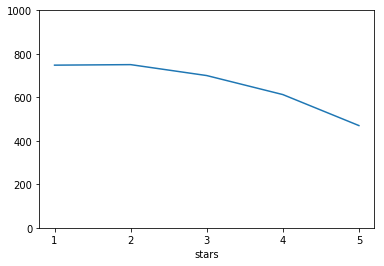

In [36]:
only_en.groupby('stars')['length'].mean().plot(xticks=[1,2,3,4,5], ylim=(0, 1000));

# Word Counts by Star Rating

In [37]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
start = time.time()
only_en['word_counts'] = only_en['text'].parallel_apply(nltk.word_tokenize).str.len()
time.time() - start

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


439.9731273651123

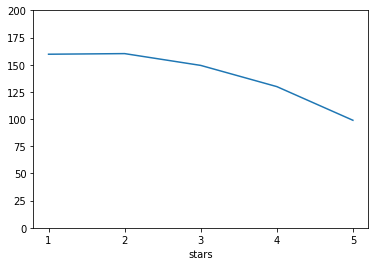

In [40]:
only_en.groupby('stars')['word_counts'].mean().plot(xticks=[1,2,3,4,5], ylim=(0, 200));

# Review Counts by user 

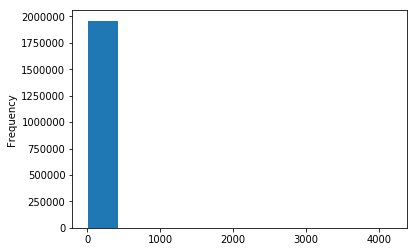

In [44]:
only_en.groupby('user_id')['text'].count().plot.hist();

In [45]:
user_review_counts = only_en.groupby('user_id')['text'].count()

In [50]:
user_review_counts.mean(), user_review_counts.median(),  user_review_counts.max()

(4.065630032390994, 1.0, 4181)

In [51]:
user_review_counts.sort_values(ascending=False)

user_id
CxDOIDnH8gp9KXzpBHJYXw    4181
bLbSNkLggFnqwNNzzq-Ijw    2550
ELcQDlf69kb-ihJfxZyL0A    2038
PKEzKWv_FktMm2mGPjwd0Q    1924
DK57YibC5ShBmqQl97CKog    1813
                          ... 
Z6W5w9YS-9kVOrH62JfGFw       1
Z6WCvdORX1mMakLDnjefLg       1
Z6WI08l9HO3pJTuloOm1Bw       1
Z6WQgnu-aP5eQ-qRrWr3uw       1
V-h-MYHLigcZcOiKY5SpSA       1
Name: text, Length: 1959804, dtype: int64

In [78]:
only_en[only_en['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw'].head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,isReliable,textBytesFound,details,vectors,lenVectors,lang,length,word_counts
1222,IQ7s_l5jjclIqkREXvBL4g,CxDOIDnH8gp9KXzpBHJYXw,w9pwbsusI9DI637UYqMctQ,5.0,6.0,2.0,7.0,Blood Brothers Brewing is worth the trek to at...,2018-07-07 21:26:22,1.0,854.0,"((ENGLISH, en, 99, 1302.0), (Unknown, un, 0, 0...","((0, 878, ENGLISH, en),)",1.0,en,878,181
2060,1WduO2WTk1Ya5n-4mZJRaw,CxDOIDnH8gp9KXzpBHJYXw,ZI8Aa41WiFj1XYJRUC54ug,3.0,2.0,1.0,2.0,Thang Long is another Vietnamese Restaurant wi...,2010-11-22 22:22:46,1.0,1670.0,"((ENGLISH, en, 99, 1150.0), (Unknown, un, 0, 0...","((0, 1782, ENGLISH, en),)",1.0,en,1782,365
2886,YU6Npv4PH5cbNPos0Eg8Mw,CxDOIDnH8gp9KXzpBHJYXw,FaCxpKgHPgUO9vqyOny5CA,4.0,1.0,0.0,0.0,Montreal's bagels. everyone telling me about h...,2012-03-01 03:01:58,1.0,423.0,"((ENGLISH, en, 99, 1213.0), (Unknown, un, 0, 0...","((0, 444, ENGLISH, en),)",1.0,en,444,95
3835,qS7D3jwLxkQ8Z6Yo36enog,CxDOIDnH8gp9KXzpBHJYXw,i6TgZAX3733aPIMnzje5-g,2.0,0.0,0.0,0.0,2.5 star\n\nMy experience with Arepa is limite...,2011-10-27 22:52:15,1.0,1745.0,"((ENGLISH, en, 99, 1095.0), (Unknown, un, 0, 0...","((0, 1872, ENGLISH, en),)",1.0,en,1872,383
3987,OzTT0fo8xpYXtVp3Ud7Tkw,CxDOIDnH8gp9KXzpBHJYXw,nGAw4TZ8pBT7ZQxi-Mxf8Q,2.0,2.0,1.0,1.0,I am reviewing Asian King based on their Lunch...,2011-07-28 22:32:01,1.0,594.0,"((ENGLISH, en, 99, 1260.0), (Unknown, un, 0, 0...","((0, 641, ENGLISH, en),)",1.0,en,641,139


In [81]:
only_en[only_en['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']['stars'].mean()

3.24563501554652

In [82]:
only_en[only_en['user_id'] == 'bLbSNkLggFnqwNNzzq-Ijw']['stars'].mean()

3.324705882352941

In [83]:
only_en[only_en['user_id'] == 'ELcQDlf69kb-ihJfxZyL0A']['stars'].mean()

3.101570166830226

In [62]:
user_review_avg = only_en.groupby('user_id')['stars'].mean()

# Review Counts by Business 

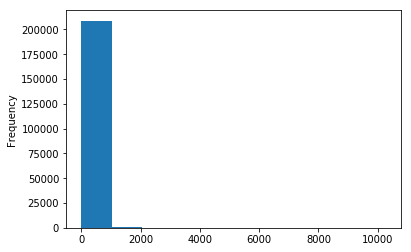

In [54]:
only_en.groupby('business_id')['text'].count().plot.hist();

In [57]:
business_review_counts = only_en.groupby('business_id')['text'].count()

In [58]:
business_review_counts.mean(), business_review_counts.median(),  business_review_counts.max()

(38.074439719023275, 10.0, 10269)

In [59]:
business_review_counts.sort_values(ascending=False)

business_id
RESDUcs7fIiihp38-d6_6g    10269
4JNXUYY8wbaaDmk3BPzlWw     9457
K7lWdNUhCbcnEvI0NhGewg     7540
f4x1YBxkLrZg652xt2KR5g     6840
cYwJA2A6I12KNkm2rtXd5g     5536
                          ...  
H8SC_FBd8Ia7m4u7NmFkEQ        1
e42x0b05xrsxM1bY5yX8ug        1
dCytjI9WF7pru2cDQzOoMQ        1
U2Rt8Xv9Dt3PPx01zYYF2A        1
OJ31mKU9eFN9ndf6t1QLBA        1
Name: text, Length: 209270, dtype: int64

In [79]:
only_en[only_en['business_id'] == 'RESDUcs7fIiihp38-d6_6g'].head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,isReliable,textBytesFound,details,vectors,lenVectors,lang,length,word_counts
2370340,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5.0,0.0,1.0,0.0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,1.0,904.0,"((ENGLISH, en, 99, 1248.0), (Unknown, un, 0, 0...","((0, 937, ENGLISH, en),)",1.0,en,937,208
2370359,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4.0,39.0,21.0,29.0,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,1.0,4689.0,"((ENGLISH, en, 99, 1288.0), (Unknown, un, 0, 0...","((0, 4978, ENGLISH, en),)",1.0,en,4975,1043
2370375,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4.0,1.0,1.0,1.0,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,1.0,639.0,"((ENGLISH, en, 99, 1203.0), (Unknown, un, 0, 0...","((0, 671, ENGLISH, en),)",1.0,en,671,143
2370413,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1.0,0.0,0.0,0.0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,1.0,91.0,"((ENGLISH, en, 98, 1342.0), (Unknown, un, 0, 0...","((0, 92, ENGLISH, en),)",1.0,en,92,21
2370502,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5.0,0.0,0.0,0.0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,1.0,326.0,"((ENGLISH, en, 99, 1260.0), (Unknown, un, 0, 0...","((0, 333, ENGLISH, en),)",1.0,en,333,71


In [61]:
only_en[only_en['business_id'] == 'RESDUcs7fIiihp38-d6_6g']['stars'].mean()

3.774856363813419

In [84]:
only_en[only_en['business_id'] == 'cYwJA2A6I12KNkm2rtXd5g']['stars'].mean()

3.8923410404624277

# Get Counts of Other Properties 

In [87]:
only_en[['useful', 'funny', 'cool']].mean()

useful    1.318491
funny     0.456882
cool      0.569650
dtype: float64

In [88]:
only_en[['useful', 'funny', 'cool']].median()

useful    0.0
funny     0.0
cool      0.0
dtype: float64

In [89]:
only_en[['useful', 'funny', 'cool']].max()

useful    1122.0
funny      976.0
cool       502.0
dtype: float64

In [97]:
only_en[only_en['funny'] > 900]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,isReliable,textBytesFound,details,vectors,lenVectors,lang,length,word_counts
6266847,dpfVRGN9BN-iY_l06TOJUg,5TCgTJE7uZ848zOEEUiVNg,DN0b4Un8--Uf6SEWLeh0UA,5.0,93.0,976.0,44.0,I refuse to judge a place before I try it and ...,2014-02-18 16:03:35,1.0,4121.0,"((ENGLISH, en, 99, 1285.0), (Unknown, un, 0, 0...","((0, 4279, ENGLISH, en),)",1.0,en,4279,880


In [96]:
print(only_en[only_en['funny'] > 900]['text'].iloc[0])

I refuse to judge a place before I try it and you should too!

Like many of you, I watched the season finale of Kitchen Nightmares.  Working in a family business myself and knowing it is never easy, I wondered if owners Amy and Samy could possibly be like they were portrayed on the show or if there was some fancy editing done on the show.  Knowing that reality TV is usually far from reality, off we went last Saturday night for dinner at Amy's Baking Company.

I called the Monday before our planned dinner and made reservations for four.  I spoke with Samy and he kindly took my reservation even though he told me we didn't need to make one.  Plans changed and by Saturday night our group had grown to seven but I was reluctant to call and advise them of the change.  I was a little nervous....would they be mad?  Would Samy yell at me?  Silly questions, I know but legitimate ones after watching the show.   He really is a nice guy and I was silly to think otherwise.  My husband and I walked in

I need to get some word clouds now, but i think i'll do that in another notebook.